In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import seaborn as sns

In [4]:
from sklearn.decomposition import PCA

In [5]:
list_files = glob.glob("Extracted_Input/Extracted_Input_*")
log = pd.read_csv("Extracted_Input/Log.csv", header=None)

In [6]:
log

,0,1,2,3,4,5,6,7,8,9,10,11
0,it,Reduction,ts_num,epochs,batch_size,arch,mlp,base_lr,wd,sim_coeff,std_coeff,cov_coeff
1,0,0.1,30,500,2048,resnet34,1024-1024-1024,0.2,1e-06,25.0,25.0,1.0
2,1,0.1,30,500,2048,resnet34,2048-2048-2048,0.2,1e-06,25.0,25.0,1.0
3,2,0.1,30,500,2048,resnet34,4096-4096-4096,0.2,1e-06,25.0,25.0,1.0
4,3,0.1,30,500,2048,resnet34,8192-8192-8192,0.2,1e-06,25.0,25.0,1.0
5,4,0.1,30,500,2048,resnet50,1024-1024-1024,0.2,1e-06,25.0,25.0,1.0
6,5,0.1,30,500,2048,resnet50,2048-2048-2048,0.2,1e-06,25.0,25.0,1.0
7,6,0.1,30,500,2048,resnet50,4096-4096-4096,0.2,1e-06,25.0,25.0,1.0
8,7,0.1,30,500,2048,resnet50,8192-8192-8192,0.2,1e-06,25.0,25.0,1.0
9,8,0.1,30,500,2048,resnet101,1024-1024-1024,0.2,1e-06,25.0,25.0,1.0


Extracted_Input/Extracted_Input_12.csv


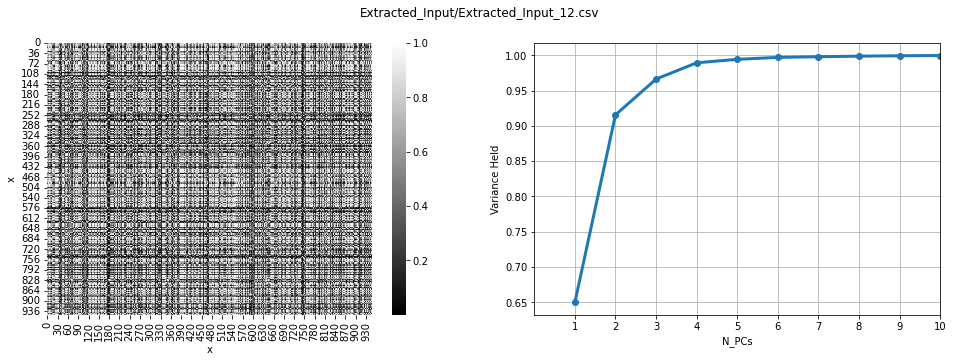

In [7]:
for file in list_files:
    i = int(file.split("_")[-1].split(".")[0])
    fig_file = file.replace('.csv','.png')
    fig_file = fig_file.replace('Extracted_Input/', 'figures/')
    print(file)
    X = pd.read_csv(file, header=None).values
    y = X[:,-1]
    X = X[:, :-1]
    
    col = np.all(X == X[0,:], axis = 0)
    X = X[:,np.invert(col)]
    
    L, W = X.shape
    
    n_pcs = np.min([L,W])
    pca = PCA(n_components=n_pcs)
    X_projected = pca.fit_transform(X)
    
    x1 = X[:, :W//2]
    x2 = X[:, W//2:]
    cov = np.abs(np.corrcoef(X.T))
    
    f = plt.figure(figsize=(16,5))
    ax = f.subplots(1,2)
    
    sns.heatmap(cov, cmap="gray", ax=ax[0])
    ax[0].set_xlabel('x')
    ax[0].set_ylabel('x')
    
    acc = pca.explained_variance_ratio_.copy()
    for i in range(1, len(acc)):
        acc[i] += acc[i-1]

    ax[1].plot(np.arange(1, n_pcs+1), acc, linewidth=3, marker='o')
    ax[1].set_xticks(np.arange(1, n_pcs+1))
    ax[1].set_xlim([0,10])
    ax[1].grid()
    ax[1].set_xlabel('N_PCs')
    ax[1].set_ylabel('Variance Held')
    
    plt.suptitle(file)
    plt.savefig(fig_file, bbox_inches='tight')
    plt.show()
    break

In [ ]:
acc = pca.explained_variance_ratio_.copy()
for i in range(1, len(acc)):
    acc[i] += acc[i-1]
    
plt.figure(figsize=(10,7))
plt.plot(np.arange(1, n_pcs+1), acc, linewidth=3, marker='o')
plt.xticks(np.arange(1, n_pcs+1))
plt.xlim([0,10])
plt.grid()
plt.show()

In [ ]:
plt.figure(figsize=(10,7))
plt.bar(np.arange(1, n_pcs+1), pca.explained_variance_ratio_)
plt.show()

In [ ]:

cov = np.abs(np.corrcoef(X_projected.T))
    
plt.figure(figsize=(10,7))
sns.heatmap(cov, cmap="gray")
plt.show()

In [ ]:
X.shape